In [8]:
#Git Hub link:
#https://github.com/christacaggiano/machine_learning_exercises/blob/main/chest_pain_prediction.ipynb
import pandas as pd 
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, SelectKBest, f_classif, chi2, VarianceThreshold
from sklearn.pipeline import make_pipeline




In [4]:
cleanedDf = pd.read_csv("cleaned_SwedishData.csv", delimiter=",")
expressionData = pd.read_csv("cleaned_ExpressionData.csv", delimiter=",")

cleanedDftest = pd.read_csv("cleaned_SpanishData.csv", delimiter=",")
expressionDatatest = pd.read_csv("cleaned_SpanishExpressionData.csv", delimiter=",")

In [5]:
cleanedDf

,!Sample_geo_accession,Gender,Age,Allergy,Asthma,Dermatitis,rhinitis
0,GSM4209620,1,195.5592,1,0,1,0
1,GSM4209621,1,204.0461,0,0,0,0
2,GSM4209622,0,201.6776,1,1,1,0
3,GSM4209623,1,205.6250,1,1,0,0
4,GSM4209624,0,202.8947,0,0,0,0
...,...,...,...,...,...,...,...
251,GSM4209871,1,201.7105,0,0,0,0
252,GSM4209872,1,201.5461,1,1,0,1
253,GSM4209873,0,202.7631,0,0,0,0
254,GSM4209874,1,203.2237,0,0,0,0


In [6]:
expressionData.head()

,TC01000001.hg.1,TC01000002.hg.1,TC01000003.hg.1,TC01000004.hg.1,TC01000005.hg.1,TC01000006.hg.1,TC01000007.hg.1,TC01000008.hg.1,TC01000009.hg.1,TC01000010.hg.1,...,TCUn_gl000228000012.hg.1,TCUn_gl000228000013.hg.1,TCUn_gl000228000014.hg.1,TCUn_gl000237000001.hg.1,TCUn_gl000237000002.hg.1,TCUn_gl000241000001.hg.1,TCUn_gl000241000002.hg.1,TCUn_gl000243000001.hg.1,TCUn_gl000243000002.hg.1,TCUn_gl000247000001.hg.1
0,7.429823,4.388578,2.371792,5.275303,9.702489,11.799802,12.070954,6.996882,1.614111,3.492010,...,2.657722,6.307265,4.691915,6.020328,5.831065,5.642116,5.795866,6.400864,6.347468,6.400864
1,6.185963,4.001252,1.935577,6.272907,10.218112,11.969852,12.667002,8.177514,1.529896,3.043273,...,3.153498,6.036182,4.904974,5.684232,5.599217,5.592368,5.775740,5.094467,6.672159,5.094467
2,7.825112,4.261002,2.641741,5.066341,9.856455,11.973046,12.180124,7.075101,2.286690,3.299668,...,2.677549,6.229489,4.804676,5.898304,5.818457,5.232601,5.374681,3.737465,6.181059,3.737465
3,5.970286,4.018165,1.942758,5.142228,10.081747,12.224622,12.343981,8.123771,1.429856,3.175787,...,2.634139,6.276416,5.101769,5.800389,5.764109,5.830511,5.962839,5.765790,6.613098,5.765790
4,5.057495,4.067344,1.857217,5.073486,9.537027,11.809516,12.237580,7.427976,1.512572,3.546307,...,2.637874,6.438287,5.226228,5.960240,5.819446,5.534489,5.722457,5.056717,6.293271,5.056717


In [7]:
y = cleanedDf["Allergy"].values
x = expressionData.values

y2 = cleanedDftest["Allergy"].values
x2 = expressionDatatest.values

gene_ids = list(expressionData)

In [5]:
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)
x

array([[0.72399169, 0.65603207, 0.49143733, ..., 0.7908943 , 0.48459638,
        0.7908943 ],
       [0.34438794, 0.25625731, 0.27385256, ..., 0.53944885, 0.59869193,
        0.53944885],
       [0.84462667, 0.52435493, 0.62608797, ..., 0.2782633 , 0.42612036,
        0.2782633 ],
       ...,
       [0.40380817, 0.45485131, 0.28374654, ..., 0.48638804, 0.56618022,
        0.48638804],
       [0.51697511, 0.25965823, 0.23694162, ..., 0.65732444, 0.48182378,
        0.65732444],
       [0.53818722, 0.45595108, 0.26674716, ..., 0.77529279, 0.4181142 ,
        0.77529279]])

In [6]:
scaler = MinMaxScaler()
scaler.fit(x2)
x2 = scaler.transform(x2)

In [100]:
#KBest
selector = SelectKBest(f_classif, k=125)
x_new = selector.fit_transform(x, y)

x_new.shape

(256, 125)

In [ ]:
#chi squared
selector = SelectKBest(chi2, k=325)
x_new = selector.fit_transform(x, y)
index_list = selector.get_support(indices=True)
index_list
gene_ids = list(expressionData)
gene_names = [gene_ids[i] for i in index_list]



In [23]:
#chi squared
selector = SelectKBest(chi2, k=325)
x2_new = selector.fit_transform(x2, y2)
index_list2 = selector.get_support(indices=True)
index_list2
gene_ids2 = list(expressionDatatest)
gene_names2 = [gene_ids2[i] for i in index_list2]
gene_names2


['TC01000406.hg.1',
 'TC01000481.hg.1',
 'TC01000501.hg.1',
 'TC01000745.hg.1',
 'TC01000751.hg.1',
 'TC01001409.hg.1',
 'TC01001525.hg.1',
 'TC01001622.hg.1',
 'TC01001740.hg.1',
 'TC01001965.hg.1',
 'TC01002040.hg.1',
 'TC01002297.hg.1',
 'TC01002911.hg.1',
 'TC01002986.hg.1',
 'TC01003475.hg.1',
 'TC01004085.hg.1',
 'TC01004432.hg.1',
 'TC01004544.hg.1',
 'TC01004601.hg.1',
 'TC01004661.hg.1',
 'TC01004669.hg.1',
 'TC01004815.hg.1',
 'TC01004991.hg.1',
 'TC01005105.hg.1',
 'TC01005117.hg.1',
 'TC01005304.hg.1',
 'TC01005553.hg.1',
 'TC01006026.hg.1',
 'TC01006039.hg.1',
 'TC01006269.hg.1',
 'TC02000245.hg.1',
 'TC02000466.hg.1',
 'TC02000495.hg.1',
 'TC02001131.hg.1',
 'TC02001746.hg.1',
 'TC02001945.hg.1',
 'TC02002038.hg.1',
 'TC02002280.hg.1',
 'TC02002631.hg.1',
 'TC02002702.hg.1',
 'TC02003086.hg.1',
 'TC02004026.hg.1',
 'TC02004251.hg.1',
 'TC02004272.hg.1',
 'TC02004669.hg.1',
 'TC02004678.hg.1',
 'TC02004994.hg.1',
 'TC02005061.hg.1',
 'TC02005062.hg.1',
 'TC03000431.hg.1',


In [512]:
#Variance
selector = VarianceThreshold(0.4551)
x_new = selector.fit_transform(x)

x_new.shape

(256, 380)

In [681]:
#Std
stds = []
for f in range(67528):
    column = x[:,f]
    #print(column.std(), f)
    stds.append((column.std(),f))
stds.sort(reverse=True)
stds = [t[1] for t in stds]
x_new = x[:,stds]
x_new = x_new[:,:50000]

x_new.shape

(256, 50000)

In [132]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
x

array([[ 0.90847199,  1.41805667,  0.74931575, ...,  1.07925569,
         0.05709288,  1.07925569],
       [-0.92867153, -1.08307239, -0.80710111, ..., -0.6367761 ,
         0.9184368 , -0.6367761 ],
       [ 1.49230127,  0.59423895,  1.71249219, ..., -2.41928087,
        -0.38436145, -2.41928087],
       ...,
       [-0.64109929,  0.15940028, -0.73632796, ..., -0.99889856,
         0.67299551, -0.99889856],
       [-0.09341263, -1.06179502, -1.07113066, ...,  0.16768574,
         0.03616156,  0.16768574],
       [ 0.00924621,  0.16628082, -0.8579271 , ...,  0.97278055,
        -0.44480247,  0.97278055]])

In [9]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_new, y, test_size=0.3, random_state=0)

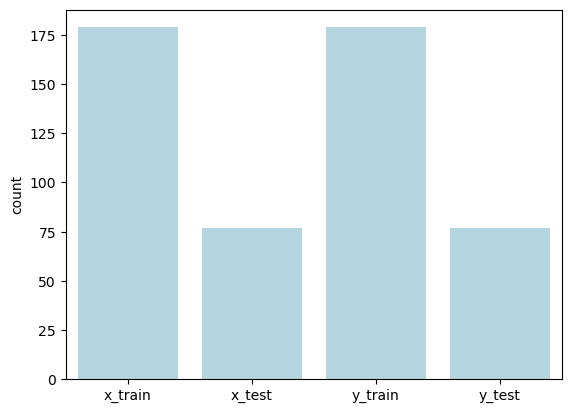

In [10]:
#plot training and testing data
sns.barplot(x=["x_train", "x_test", "y_train", "y_test"], 
            y=[len(x_train), len(x_test), len(y_train), len(y_test)],
           color="lightblue")
plt.ylabel("count")
plt.show()

In [11]:
lr = LogisticRegression(max_iter=1000)



In [12]:
x_train

array([[0.29434224, 0.55061084, 0.47595008, ..., 0.69194709, 0.64963356,
        0.69233871],
       [0.27980495, 0.68120848, 0.63380643, ..., 0.45568463, 0.50563504,
        0.75725336],
       [0.37243095, 0.66000776, 0.63200361, ..., 0.6456301 , 0.62386823,
        0.57534463],
       ...,
       [0.60049354, 0.71870478, 0.76195533, ..., 0.5927587 , 0.61226771,
        0.95327725],
       [0.3225549 , 0.42764018, 0.27656018, ..., 0.14463446, 0.15710835,
        0.53584649],
       [0.68085706, 0.87460141, 0.75925802, ..., 0.28277857, 0.34122979,
        0.90952156]])

In [13]:
lr.fit(x_train,y_train)



LogisticRegression(max_iter=1000)

In [14]:
x_train.shape

(179, 325)

In [15]:
y_train.shape

(179,)

In [16]:
y_pred = lr.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

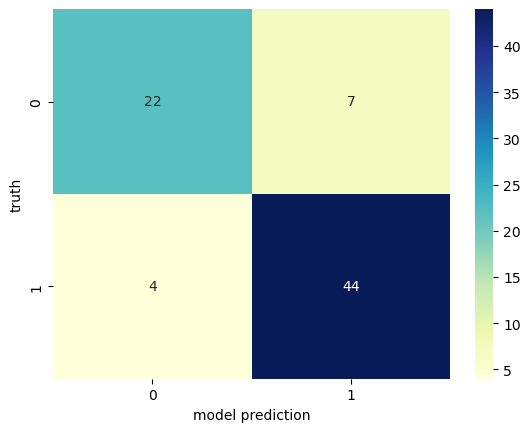

In [17]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show() 

In [18]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        26
           1       0.92      0.86      0.89        51

    accuracy                           0.86        77
   macro avg       0.84      0.85      0.84        77
weighted avg       0.86      0.86      0.86        77



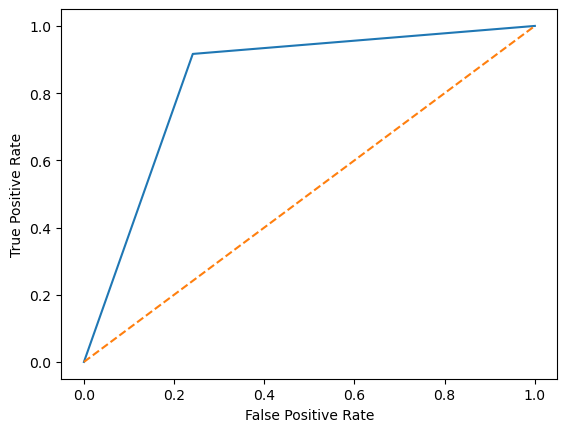

In [19]:
fpr, tpr, _ = roc_curve(y_test,  y_pred)

plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle="dashed")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
roc_auc_score(y_test, y_pred)

0.8376436781609194

In [24]:
# test on spanish data
y_pred2 = lr.predict(x2_new)
y_pred2


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

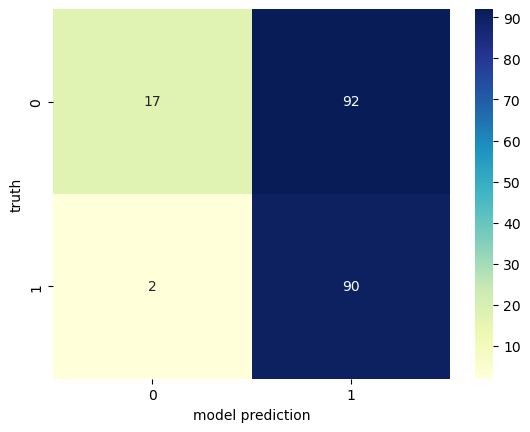

In [25]:
cnf_matrix = metrics.confusion_matrix(y2, y_pred2) 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show() 

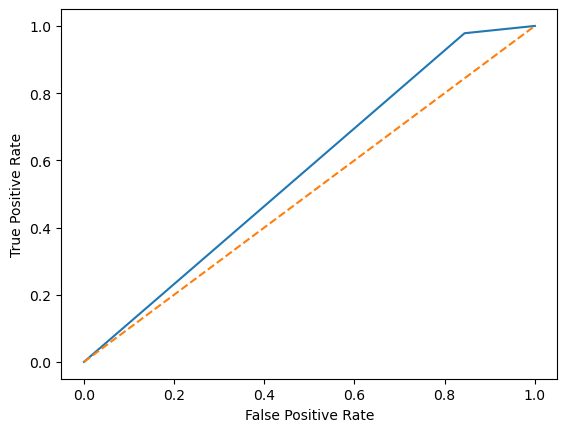

In [26]:
fpr, tpr, _ = roc_curve(y2,  np.rint(y_pred2))

plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle="dashed")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [27]:
roc_auc_score(y2, np.rint(y_pred2))

0.5671120861587554

In [169]:
lst = list(np.exp(lr.coef_[0]))
lst = [(lst[i],i) for i in range(len(lst))]

In [173]:
lst.sort(reverse = True)
count = 0
for e in lst:
    if count< 10:
        print(str(e[0]) + "  " + str(index_list[e[1]]) +"  "+ str(gene_names[e[1]]))
        
    count+=1

2.205385978041182  4950  TC01005033.hg.1
2.1766513140621173  31035  TC08002582.hg.1
1.9852226388791214  31117  TC09000026.hg.1
1.908852314129577  41213  TC11001630.hg.1
1.8812815768661024  47799  TC13001474.hg.1
1.7440989762457715  12110  TC03000796.hg.1
1.7385584521681374  8298  TC02002006.hg.1
1.7182755318408798  26539  TC07001442.hg.1
1.6772962371988314  35064  TC0X001076.hg.1
1.6725569098253859  48411  TC14000378.hg.1


In [ ]:
sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="swarm")